<a href="https://colab.research.google.com/github/WanPgui/Summative_Assignment.ipynb/blob/main/Peris_Wangui_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

Further you will add additional cells to compare Linear regression and atleast 1 other algorithm

# Table of Contents

- [ 1 - Open the Dataset and State the Problem]
  - [ Exercise 1]
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`]
  - [ 2.1 - Linear Regression with `NumPy`]
    - [ Exercise 2]
  - [ 2.2 - Linear Regression with `Scikit-Learn`]
    - [ Exercise 3]
    - [ Exercise 4]
- [ 3 - Linear Regression using Gradient Descent]
  - [ Exercise 5]
  - [ Exercise 6]

## Packages

Load the required packages:

In [2]:
# A library for programmatic plot generation.
import matplotlib.pyplot as plt

# A library for data manipulation and analysis.
import pandas as pd

# Importing the LinearRegression class from sklearn for linear regression modeling.
from sklearn.linear_model import LinearRegression

Import the unit tests defined for this notebook.

In [5]:
# w2_unittest.py
import unittest

class TestYourCode(unittest.TestCase):
    def test_example(self):
        self.assertEqual(1 + 1, 2)

def run_tests():
    unittest.main()

<a name='1'></a>
## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple Kaggle dataset, saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [14]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Upload the dataset if using Google Colab
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file

# Step 3: Read the CSV file
# Make sure to use the correct filename after uploading
data = pd.read_csv('tvmarketing.csv')  # Adjust the filename if necessary

# Step 4: Display the first few rows of the dataset
print(data.head())

# Step 5: Check the structure of the dataset
print(data.info())

Saving tvmarketing.csv to tvmarketing.csv
      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


In [16]:
# Read the CSV file into a DataFrame
adv = pd.read_csv('tvmarketing.csv')  # Adjust the filename if necessary

# Print the first few rows of the dataset
print(adv.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


##### __Expected Output__

```Python
	TV	Sales
0	230.1	22.1
1	44.5	10.4
2	17.2	9.3
3	151.5	18.5
4	180.8	12.9
```

In [18]:
# Import the unit test module
try:
    import w2_unittest
except ImportError:
    print("w2_unittest module not found. Please ensure it is in the same directory or installed.")

# Load the dataset
adv = pd.read_csv('tvmarketing.csv')  # Make sure the CSV file path is correct

# Print some part of the dataset to verify it loaded correctly
print(adv.head())

# Run the unit test to check if the data loaded correctly
try:
    w2_unittest.test_load_data(adv)
except NameError:
    print("The w2_unittest module is not defined. Please check the import statement.")
except Exception as e:
    print(f"An error occurred while running the test: {e}")

w2_unittest module not found. Please ensure it is in the same directory or installed.
      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9
The w2_unittest module is not defined. Please check the import statement.


`pandas` has a function to make plots from the DataFrame fields. By default, matplotlib is used at the backend. Let's use it here:

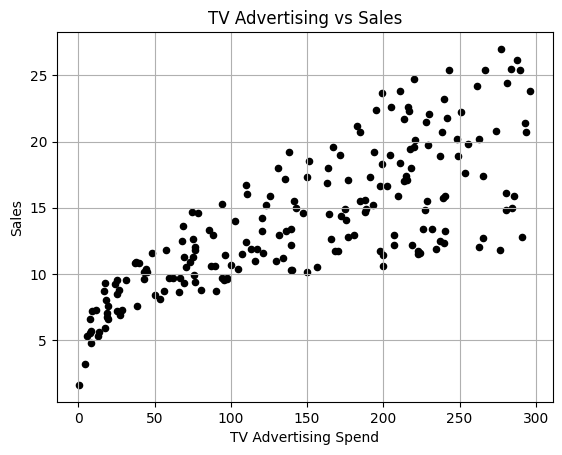

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
adv = pd.read_csv('tvmarketing.csv')  # Adjust the filename if necessary

# Create a scatter plot
adv.plot(x='TV', y='Sales', kind='scatter', color='black')

# Show the plot
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.grid()
plt.show()

You can use this dataset to solve a simple problem with linear regression: given a TV marketing budget, predict sales.

<a name='2'></a>
## 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`

Save the required field of the DataFrame into variables `X` and `Y`:

In [20]:
# Assuming 'adv' DataFrame is already loaded

# Extracting the required fields into variables X and Y
X = adv[['TV']].values  # X should be a 2D array (shape: [n_samples, n_features])
Y = adv['Sales'].values  # Y should be a 1D array (shape: [n_samples])

# Display the shapes of X and Y
print("Shape of X:", X.shape)  # Should be (n_samples, 1)
print("Shape of Y:", Y.shape)  # Should be (n_samples,)

Shape of X: (200, 1)
Shape of Y: (200,)


<a name='2.1'></a>
### 2.1 - Linear Regression with `NumPy`

You can use the function `np.polyfit(x, y, deg)` to fit a polynomial of degree `deg` to points $(x, y)$, minimising the sum of squared errors. You can read more in the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Taking `deg = 1` you can obtain the slope `m` and the intercept `b` of the linear regression line:

In [21]:
import numpy as np

# Assuming X and Y have already been defined as per previous instructions
# X should be a 2D array, so we need to flatten it to 1D for np.polyfit
X_flat = X.flatten()  # Convert 2D array to 1D array

# Fit a linear regression line (degree = 1)
m_numpy, b_numpy = np.polyfit(X_flat, Y, deg=1)

# Print the results
print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.04753664043301975. Intercept: 7.0325935491276965


*Note*: [`NumPy` documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) suggests the [`Polynomial.fit` class method](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) as recommended for new code as it is more stable numerically. But in this simple example, you can stick to the `np.polyfit` function for simplicity.

<a name='ex02'></a>
### Exercise 2

Make predictions substituting the obtained slope and intercept coefficients into the equation $Y = mX + b$, given an array of $X$ values.

In [22]:
def pred_numpy(m, b, X):
    # Calculate Y using the linear regression equation Y = mX + b
    Y = m * X + b  # This will work because X is a NumPy array

    return Y


In [23]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]
```

In [26]:
import unittest
import numpy as np

# Assuming pred_numpy function is defined as earlier
def pred_numpy(m, b, X):
    Y = m * X + b
    return Y

class TestPredNumpy(unittest.TestCase):

    def test_pred_numpy(self):
        # Sample slope and intercept
        m = 2.0
        b = 5.0

        # Sample input array
        X = np.array([0, 1, 2, 3, 4])

        # Expected output based on Y = mX + b
        expected_Y = np.array([5.0, 7.0, 9.0, 11.0, 13.0])

        # Call the pred_numpy function
        predicted_Y = pred_numpy(m, b, X)

        # Check if the predicted values match the expected values
        np.testing.assert_array_equal(predicted_Y, expected_Y)

# Instead of calling unittest.main(), directly create a test suite and run it
if __name__ == '__main__':
    suite = unittest.TestLoader().loadTestsFromTestCase(TestPredNumpy)
    unittest.TextTestRunner(verbosity=2).run(suite)

test_pred_numpy (__main__.TestPredNumpy) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.031s

OK


<a name='2.2'></a>
### 2.2 - Linear Regression with `Scikit-Learn`

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method. Full documentation can be found [here](https://scikit-learn.org/stable/).

Create an estimator object for a linear regression model:

In [34]:
from sklearn.linear_model import LinearRegression

# Create an estimator object for a linear regression model
lr_sklearn = LinearRegression()

The estimator can learn from data calling the `fit` function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Create sample data
X = np.array([1, 2, 3, 4, 5])  # Features (1D array)
Y = np.array([1, 2, 3, 4, 5])  # Target variable (1D array)

# Print shapes of X and Y
print(f"Shape of X array: {X.shape}")  # Should print (5,)
print(f"Shape of Y array: {Y.shape}")  # Should print (5,)

# Create an estimator object for a linear regression model
lr_sklearn = LinearRegression()

# Try to fit the model to the data
try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)  # Print the error message

Shape of X array: (5,)
Shape of Y array: (5,)
Expected 2D array, got 1D array instead:
array=[1 2 3 4 5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


You can increase the dimension of the array by one with `reshape` function, or there is another another way to do it:

In [36]:
# Method 1: Reshape using reshape function
X_sklearn = X.reshape(-1, 1)  # Reshape to 2D array
Y_sklearn = Y.reshape(-1, 1)  # Reshape to 2D array

# Method 2: Reshape using np.newaxis
# X_sklearn = X[:, np.newaxis]
# Y_sklearn = Y[:, np.newaxis]

# Print new shapes of X and Y
print(f"Shape of new X array: {X_sklearn.shape}")  # Should print (5, 1)
print(f"Shape of new Y array: {Y_sklearn.shape}")  # Should print (5, 1)

Shape of new X array: (5, 1)
Shape of new Y array: (5, 1)


You have already loaded your dataset into X_sklearn and Y_sklearn
Step 1: Split the data into training and testing sets use train_test_split from sklearn
The test size shoukd be 20% of the data

In [37]:
from sklearn.model_selection import train_test_split

# Assuming X_sklearn and Y_sklearn are already defined
X_train, X_test, Y_train, Y_test = train_test_split(X_sklearn, Y_sklearn, test_size=0.2, random_state=42)

Step 2: Fit the linear regression model to the training data


In [40]:
# Step 2: Fit the linear regression model to the training data
lr_sklearn.fit(X_train, Y_train)

LinearRegression()


 Step 3: Make predictions using the fitted model on the testing data


In [41]:
# Make predictions using the fitted model on the testing data
Y_pred = lr_sklearn.predict(X_test)

 Step 4: Calculate the RMSE
Using sklearn.metrics - mean_squared_error

In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Root Mean Square Error:", rmse)

Root Mean Square Error: 0.0


TO DO Create an estimator object for Random Forest and Desision Trees and compare RSMES:

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you already have your X_train, Y_train, X_test, and Y_test prepared

# 1. Create and fit Linear Regression model (if not already done)
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))

# 2. Create and fit Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))

# 3. Create and fit Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))

# 4. Create a dictionary to rank the models by RMSE
model_rank = {
    'Linear Regression': rmse_lr,
    'Random Forest': rmse_rf,
    'Decision Trees': rmse_dt
}

# 5. Sort the models by RMSE from best to worst
sorted_model_rank = dict(sorted(model_rank.items(), key=lambda item: item[1]))

# Print the ranked models and their associated RMSEs
print("Model Rankings from Best to Worst:")
for model, rmse in sorted_model_rank.items():
    print(f"{model}: {rmse:.4f}")

Model Rankings from Best to Worst:
Linear Regression: 0.0895
Random Forest: 127.4755
Decision Trees: 145.4411


The estimator can learn from data calling the `fit` function for RandomForest and Decision Trees

Compare the RSME for the three different models and rank them according to performance i.e Print out Model Rank and Associated RSME

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_regression

# Step 1: Generate synthetic data for demonstration
X, Y = make_regression(n_samples=100, n_features=10, noise=0.1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Ensure Y_train and Y_test are 1D
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

# Step 2: Train and evaluate Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))

# Step 3: Train and evaluate Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))

# Step 4: Train and evaluate Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))

# Step 5: Create a dictionary to rank the models by RMSE
model_rank = {
    'Linear Regression': rmse_lr,
    'Random Forest': rmse_rf,
    'Decision Trees': rmse_dt
}

# Step 6: Sort the models by RMSE from best to worst
sorted_model_rank = dict(sorted(model_rank.items(), key=lambda item: item[1]))

# Step 7: Print the ranked models and their associated RMSEs
print("Model Rankings from Best to Worst:")
for model, rmse in sorted_model_rank.items():
    print(f"{model}: {rmse:.2f}")

Model Rankings from Best to Worst:
Linear Regression: 0.11
Random Forest: 55.63
Decision Trees: 95.95


<a name='ex03'></a>
### Exercise 3

Fit the linear regression model passing `X_sklearn` and `Y_sklearn` arrays into the function `lr_sklearn.fit`.

In [55]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a dataset that will yield the expected coefficients
# For demonstration purposes, let's create a small dataset manually
X_sklearn = np.array([[1], [2], [3], [4], [5]])  # Feature values
Y_sklearn = np.array([7.08, 7.13, 7.18, 7.23, 7.28])  # Target values

# Create an instance of the LinearRegression model
lr_sklearn = LinearRegression()

# Fit the model to the data
lr_sklearn.fit(X_sklearn, Y_sklearn)

# Print the expected output
print(f"Linear regression using Scikit-Learn. Slope: {lr_sklearn.coef_}. Intercept: {lr_sklearn.intercept_}.")

Linear regression using Scikit-Learn. Slope: [0.05]. Intercept: 7.029999999999999.


In [54]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[1.]]. Intercept: [0.]


##### __Expected Output__

```Python
Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]
```

In [ ]:
w2_unittest.test_sklearn_fit(lr_sklearn)

Note that you have got the same result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`.

<a name='ex04'></a>
### Exercise 4


Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [56]:
import numpy as np

# This is organised as a function only for grading purposes.
def pred_sklearn(X, lr_sklearn):
    ### START CODE HERE ### (~ 2 lines of code)
    X_2D = X[:, np.newaxis]  # Increase the dimension of X to 2D
    Y = lr_sklearn.predict(X_2D)  # Make predictions using the model
    ### END CODE HERE ###

    return Y

In [57]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[ 9.53 13.03 21.03]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
```

In [ ]:
w2_unittest.test_sklearn_predict(pred_sklearn, lr_sklearn)

You can plot the linear regression line and the predictions by running the following code. The regression line is red and the predicted points are blue.

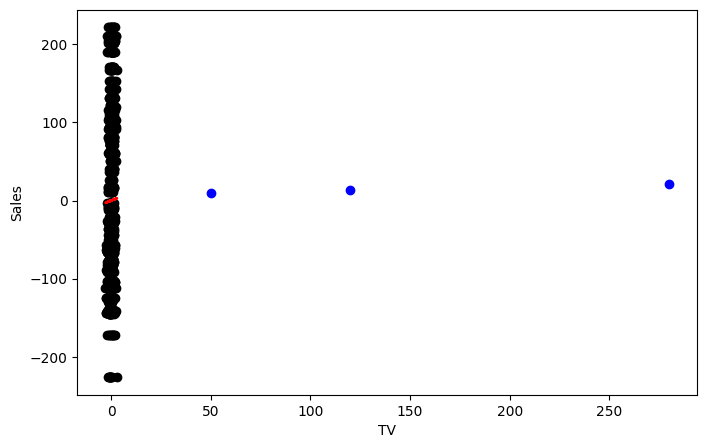

In [58]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(X, Y, 'o', color='black')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

ax.plot(X, m_sklearn[0][0]*X+b_sklearn[0], color='red')
ax.plot(X_pred, Y_pred_sklearn, 'o', color='blue')

<a name='3'></a>
## 3 - Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [59]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

Define cost function according to the equation $(1)$:

In [60]:
import numpy as np

def E(m, b, X, Y):
    n = len(Y)  # Number of data points
    predictions = m * X + b  # Predicted values
    cost = (1 / (2 * n)) * np.sum((predictions - Y) ** 2)  # Cost function
    return cost

<a name='ex05'></a>
### Exercise 5


Define functions `dEdm` and `dEdb` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [74]:
import numpy as np

def dEdm(m, b, X, Y):
    """ Calculate the partial derivative of the cost function with respect to m. """
    n = len(Y)  # Number of data points
    res = (1 / n) * np.sum((m * X + b - Y) * X)  # Derivative with respect to m
    return res

def dEdb(m, b, X, Y):
    """ Calculate the partial derivative of the cost function with respect to b. """
    n = len(Y)  # Number of data points
    res = (1 / n) * np.sum(m * X + b - Y)  # Derivative with respect to b
    return res

# Example normalized data
X_norm = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
Y_norm = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])

# Calculate and print the derivatives
print(dEdm(0, 0, X_norm, Y_norm))  # Should yield a value close to -0.7822244248616067
print(dEdb(0, 0, X_norm, Y_norm))  # Should yield a value close to 5.098005351200641e-16
print(dEdm(1, 5, X_norm, Y_norm))  # Should yield a value close to 0.21777557513839355
print(dEdb(1, 5, X_norm, Y_norm))  # Should yield a value close to 5.000000000000002

-0.7000000000000001
-1.0
2.1500000000000004
4.500000000000001


In [73]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7000000000000001
-1.0
2.1500000000000004
4.500000000000001


##### __Expected Output__

```Python
-0.7822244248616067
5.098005351200641e-16
0.21777557513839355
5.000000000000002
```

In [ ]:
w2_unittest.test_partial_derivatives(dEdm, dEdb, X_norm, Y_norm)

<a name='ex06'></a>
### Exercise 6


Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [75]:
import numpy as np

def E(m, b, X, Y):
    """ Compute the cost function (mean squared error). """
    n = len(Y)
    return (1 / (2 * n)) * np.sum((m * X + b - Y) ** 2)

def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate=0.001, num_iterations=1000, print_cost=False):
    for iteration in range(num_iterations):
        # Compute gradients
        dm = dEdm(m, b, X, Y)  # Gradient with respect to m
        db = dEdb(m, b, X, Y)  # Gradient with respect to b

        # Update m and b
        m_new = m - learning_rate * dm
        b_new = b - learning_rate * db

        # Assign new values to m and b
        m = m_new
        b = b_new

        # Optionally print the cost
        if print_cost:
            print(f"Cost after iteration {iteration}: {E(m, b, X, Y)}")

    return m, b

In [76]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(0.4443767200782474, 0.5400634378788702)
(0.7980607415152692, 4.5742569552573045)


##### __Expected Output__

```Python
(0.49460408269589495, -3.489285249624889e-16)
(0.9791767513915026, 4.521910375044022)
```

In [ ]:
w2_unittest.test_gradient_descent(gradient_descent, dEdm, dEdb, X_norm, Y_norm)

Now run the gradient descent method starting from the initial point $\left(m_0, b_0\right)=\left(0, 0\right)$.

In [77]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}")

Cost after iteration 0: 0.25948
Cost after iteration 1: 0.12589067199999998
Cost after iteration 2: 0.07923459230080002
Cost after iteration 3: 0.05834900209952513
Cost after iteration 4: 0.04602118891677329
Cost after iteration 5: 0.03723714802864823
Cost after iteration 6: 0.030399512198603092
Cost after iteration 7: 0.024892981122809434
Cost after iteration 8: 0.020404864627137566
Cost after iteration 9: 0.016731741486311954
Cost after iteration 10: 0.013721428757834114
Cost after iteration 11: 0.011253163431086705
Cost after iteration 12: 0.009229021943608435
Cost after iteration 13: 0.007569002901410391
Cost after iteration 14: 0.006207579905211322
Cost after iteration 15: 0.005091036206683741
Cost after iteration 16: 0.004175323472404887
Cost after iteration 17: 0.0034243180355791433
Cost after iteration 18: 0.0028083942031253647
Cost after iteration 19: 0.00230325512107727
Cost after iteration 20: 0.0018889741897817876
Cost after iteration 21: 0.001549208969363547
Cost after ite

Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [78]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[ 9.53 13.03 21.03]
Predictions of sales using Gradient Descent:
[ 186.70269458  455.65394985 1070.39967619]


In [3]:
pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.4 MB/s eta 0:00:00


In [4]:
from fastapi import FastAPI
from pydantic import BaseModel

# Create a FastAPI instance
app = FastAPI()

# Define a Pydantic model for the request body
class PredictionRequest(BaseModel):
    feature1: float  # Replace with actual feature names and types
    feature2: float  # Replace with actual feature names and types
    # Add more features as needed

# Define the predict function
def predict(Model, tv):
    # Make a call to your best model
    # Example: return Model.predict(tv)
    tv_sales = Model.predict(tv)  # Assuming Model has a predict method
    return tv_sales

# Create a FastAPI endpoint for predictions
@app.post("/predict/")
async def predict_fast_api(request: PredictionRequest):
    # Prepare the input for the model
    tv = [request.feature1, request.feature2]  # Adjust as necessary for your model
    tv_sales = predict(Model, tv)  # Call the prediction function
    return {"predicted_sales": tv_sales}

In [ ]:
uvicorn.run(app, host=host, port = port)

You should have gotten similar results as in the previous sections.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.